In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
Y
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Airline dataset.csv")

# Keep only the relevant columns
df = df[['airline_sentimtxr RR lent', 'text']]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Check the class distribution before preprocessing
print("Class distribution before preprocessing:")
print(df['airline_sentiment'].value_counts())

Class distribution before preprocessing:
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


In [ ]:
# Data Preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'\@w+|\#', '', text)
        text = re.sub(r'[^A-Za-z\s]', '', text.lower())
        tokens = text.split()
        tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    else:
        return ''

df['text'] = df['text'].astype(str)
df['cleaned_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Check the class distribution after preprocessing
print("Class distribution after preprocessing:")
print(df['airline_sentiment'].value_counts())

Class distribution after preprocessing:
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


In [ ]:
# Filter the dataset to ensure both classes are present
# We will take only positive and negative sentiments for binary classification
df = df[df['airline_sentiment'].isin(['positive', 'negative'])]

In [ ]:
# Check the class distribution after filtering
print("Class distribution after filtering:")
print(df['airline_sentiment'].value_counts())


Class distribution after filtering:
airline_sentiment
negative    9178
positive    2363
Name: count, dtype: int64


In [ ]:
# Sentiment Analysis Labels
df['sentiment'] = df['airline_sentiment']

In [ ]:
# Ensure that both classes are present
if df['sentiment'].nunique() < 2:
    raise ValueError("The dataset needs to contain at least two classes for training the model.")

In [ ]:
# Feature Extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Check the distribution of classes in the training set
print("Class distribution in the training set:")
print(y_train.value_counts())

Class distribution in the training set:
sentiment
negative    7342
positive    1890
Name: count, dtype: int64


In [ ]:
# Train the Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Evaluate the Model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1779   57]
 [ 143  330]]
              precision    recall  f1-score   support

    negative       0.93      0.97      0.95      1836
    positive       0.85      0.70      0.77       473

    accuracy                           0.91      2309
   macro avg       0.89      0.83      0.86      2309
weighted avg       0.91      0.91      0.91      2309



 Visualize the Results


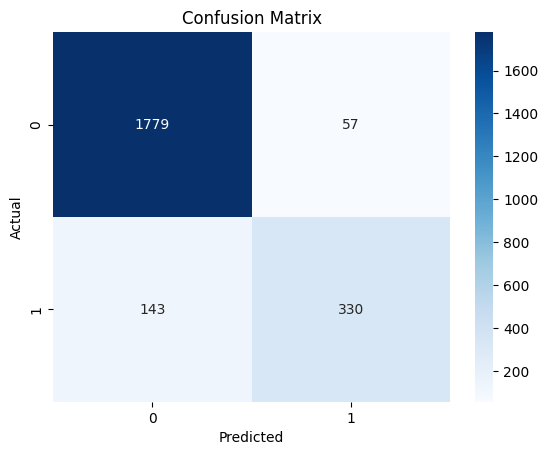

In [ ]:
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Introduction:

The confusion matrix provides a summary of the performance of our logistic regression model on the test data for Twitter sentiment analysis.

Details:


True Negatives (TN = 1779): Correctly predicted negative tweets.

False Positives (FP = 57): Negative tweets incorrectly predicted as positive.

False Negatives (FN = 143): Positive tweets incorrectly predicted as negative.

True Positives (TP = 330): Correctly predicted positive tweets.

Performance Metrics:

Accuracy: 91.4%

The model correctly predicted the sentiment of 91.4% of the tweets.

Precision: 85.3%

Of the tweets predicted as positive, 85.3% were actually positive.

Recall: 69.8%

The model correctly identified 69.8% of the actual positive tweets.

F1 Score: 76.7%

This score balances precision and recall, indicating the overall effectiveness of the model.

Conclusion:

The confusion matrix heatmap visually illustrates the balance between true positives, true negatives, and the errors (false positives and false negatives).

Overall, the model demonstrates high accuracy and precision, though there is room for improvement in recall.

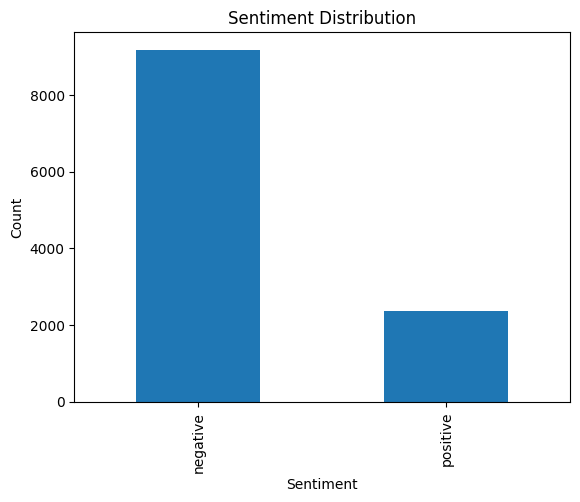

In [ ]:
# Bar Graph for Sentiment Distribution
df['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

Introduction:

The bar graph illustrates the distribution of sentiments (positive and negative) in our Twitter dataset.
Details:

Negative Tweets: The dataset contains approximately 9000 negative tweets.

Positive Tweets: The dataset contains approximately 2500 positive tweets.

Insights:

Imbalanced Dataset:
The dataset shows a significant imbalance, with negative tweets far outnumbering positive tweets.

This imbalance can lead to a bias in the sentiment analysis model, favoring negative sentiment predictions.

Impact on Model Performance:

To mitigate the effects of the imbalance, techniques such as stratified sampling during train-test splitting and performance metrics like F1 score, precision, and recall are crucial.

Data Augmentation Considerations:

Depending on the severity of the imbalance, data augmentation techniques like oversampling positive tweets or undersampling negative tweets may be necessary to enhance the model's performance.

Conclusion:

Understanding the distribution of sentiments in the dataset is critical for developing a robust sentiment analysis model.

Addressing the class imbalance is essential to ensure the model performs well across both sentiment categories.

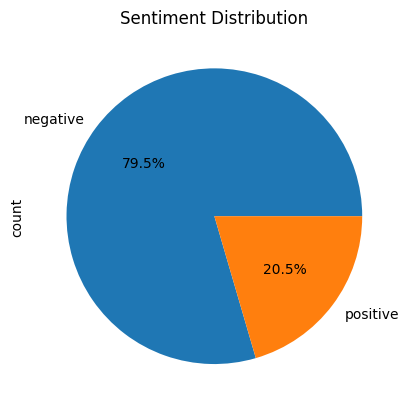

In [ ]:
# Pie Chart for Sentiment Distribution
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

Introduction:

The pie chart illustrates the distribution of sentiments (positive and negative) in our Twitter dataset.

Details:

Negative Tweets: Negative tweets constitute 79.5% of the dataset.
    
Positive Tweets: Positive tweets constitute 20.5% of the dataset.
    
Insights:

Imbalanced Dataset:
    
The dataset shows a significant imbalance, with negative tweets making up a much larger portion (79.5%) compared to positive tweets (20.5%).

This imbalance can lead to a bias in the sentiment analysis model, favoring negative sentiment predictions.

Impact on Model Performance:
    
To mitigate the effects of the imbalance, techniques such as stratified sampling during train-test splitting and performance metrics like F1 score, precision, and recall are crucial.

Data Augmentation Considerations:
    
Depending on the severity of the imbalance, data augmentation techniques like oversampling positive tweets or undersampling negative tweets may be necessary to enhance the model's performance.

Conclusion:

Understanding the distribution of sentiments in the dataset is critical for developing a robust sentiment analysis model.

Addressing the class imbalance is essential to ensure the model performs well across both sentiment categories.

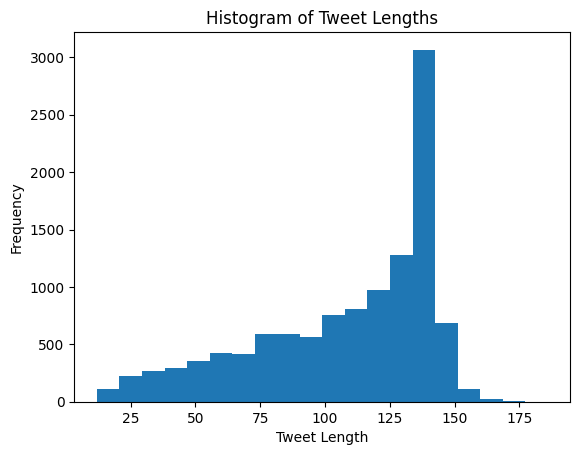

In [ ]:
# Histogram of Tweet Lengths
df['text_length'] = df['text'].apply(len)
df['text_length'].plot(kind='hist', bins=20)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Histogram of Tweet Lengths')
plt.show()

Title: Histogram of Tweet Lengths
    
X-Axis: Represents the tweet length in characters (ranging from 0 to just under 175).
    
Y-Axis: Indicates the frequency of tweets for each length category (ranging from 0 to 3000).
    
Observations:
    
Most tweets cluster around the 140-character mark, which is the historical character limit for tweets on Twitter.

There is a sharp drop-off in frequency for tweet lengths greater than 140 characters.

Very few tweets have lengths close to 0 or approaching the maximum limit.

This pattern suggests that users tend to maximize their use of available characters when composing tweets.

The histogram provides insights into user behavior on Twitter and could be useful for data analysis presentations or social media studies.